# Ege Bölgesi için Makine Öğrenmesi Destekli Emlak Değerleme Analizi

## Verilerin Yüklenmesi ve Birleştirilmesi

Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Matplotlib is building the font cache; this may take a moment.


hepsiemlak.com sitesinden Ege Bölgesi'nde yer alan kiralık ev ilanlarına ait veriler çekilmiştir. Bu veriler hepsiemlak klasörünün içerisindeki .csv dosyalarında bulunmaktadır. Bu dosyaların tamamını okuyarak birleştirme işlemi:

In [2]:
files = os.listdir('hepsiemlak')
df = pd.concat([pd.read_csv('hepsiemlak/' + file) for file in files], ignore_index=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   img-link href        8136 non-null   object 
 1   photo-count          8130 non-null   float64
 2   list-view-price      8136 non-null   object 
 3   list-view-date       8136 non-null   object 
 4   celly                8136 non-null   object 
 5   celly 2              8136 non-null   object 
 6   celly 3              8136 non-null   object 
 7   celly 4              6858 non-null   object 
 8   list-view-header     8129 non-null   object 
 9   list-view-location   8136 non-null   object 
 10  he-lazy-image src    7649 non-null   object 
 11  left                 8114 non-null   object 
 12  img-wrp href         4555 non-null   object 
 13  he-lazy-image src 2  4067 non-null   object 
 14  branded__text        134 non-null    object 
 15  branded__text 2      134 non-null    o

Verilerin bir önizlemesini yaparak sütunlar hakkında bilgi sahibi olunması:

In [3]:
print(df.head(50))

                                        img-link href  photo-count  \
0   https://www.hepsiemlak.com/usak-banaz-cumhuriy...         10.0   
1   https://www.hepsiemlak.com/usak-merkez-kemaloz...         17.0   
2   https://www.hepsiemlak.com/usak-merkez-kemaloz...         11.0   
3   https://www.hepsiemlak.com/usak-merkez-durak-k...         13.0   
4   https://www.hepsiemlak.com/usak-merkez-cumhuri...         50.0   
5   https://www.hepsiemlak.com/usak-merkez-cumhuri...         35.0   
6   https://www.hepsiemlak.com/usak-merkez-durak-k...         23.0   
7   https://www.hepsiemlak.com/usak-merkez-unalan-...         10.0   
8   https://www.hepsiemlak.com/usak-merkez-kemaloz...         13.0   
9   https://www.hepsiemlak.com/usak-merkez-cumhuri...         30.0   
10  https://www.hepsiemlak.com/usak-merkez-fatih-k...         11.0   
11  https://www.hepsiemlak.com/usak-merkez-unalan-...         11.0   
12  https://www.hepsiemlak.com/usak-merkez-kemaloz...         30.0   
13  https://www.heps

Kullanılmayacak olan sütunların çıkarılması:

In [4]:
df.drop(['photo-count', 'list-view-date', 'he-lazy-image src', 'left', 'img-wrp href', 'he-lazy-image src 2', 'branded__text', 'branded__text 2', 'img-wrp href 2', 'he-lazy-image src 3'], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   img-link href       8136 non-null   object
 1   list-view-price     8136 non-null   object
 2   celly               8136 non-null   object
 3   celly 2             8136 non-null   object
 4   celly 3             8136 non-null   object
 5   celly 4             6858 non-null   object
 6   list-view-header    8129 non-null   object
 7   list-view-location  8136 non-null   object
dtypes: object(8)
memory usage: 508.6+ KB
None


İl, ilçe ve mahalle değerlerinin `img-link href` sütunundan ayrıştırılması

In [5]:
df['location'] = df['img-link href'].apply(lambda x: x.split('/')[3])
df['city'] = df['location'].str.split('-').str[0]
df['district'] = df['location'].str.split('-').str[1]
df['neighborhood'] = df['location'].str.split('-').str[2:-1]
df['neighborhood'] = df['neighborhood'].apply(lambda x: ' '.join(x))
df.drop(['location', 'img-link href'], axis=1, inplace=True)

In [6]:
print(df[['city', 'district', 'neighborhood']].sample(50))

                city      district  neighborhood
174            izmir          buca      murathan
5686           mugla       dalaman      altintas
5345           izmir         konak      alsancak
1636           izmir          buca       adatepe
7254           mugla        bodrum      kumbahce
5429           izmir         cesme       alacati
7100           mugla        bodrum     yalikavak
6386           mugla      koycegiz    dogusbelen
2709           izmir          buca         inonu
5975           mugla       mentese       kotekli
1805           izmir      menderes     cuneytbey
397            izmir        odemis    cumhuriyet
7253           mugla        bodrum    turgutreis
4776           izmir         cigli      atasehir
3818         denizli  merkezefendi       gultepe
3496           aydin      kusadasi    guzelcamli
800            izmir         konak      alsancak
6869          manisa       akhisar         inonu
2207           izmir       bornova    kazimdirik
4668           izmir

Ayrıştırılan il ve ilçelerin histogram olarak görselleştirilmesi

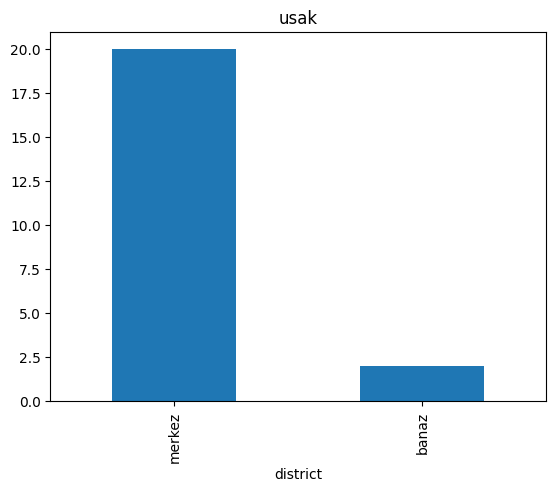

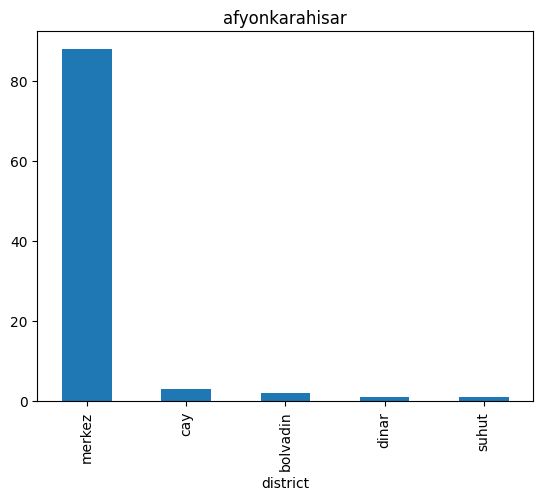

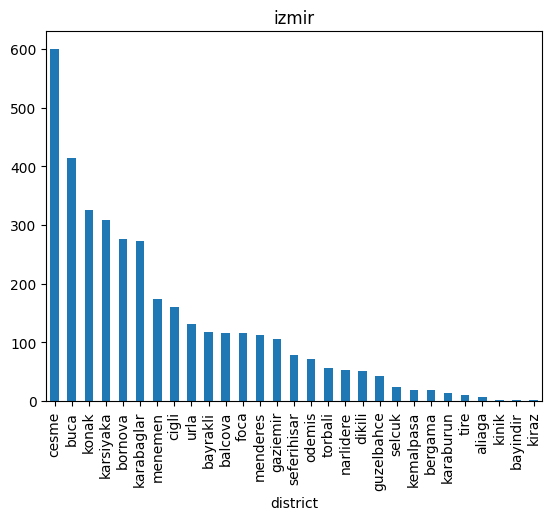

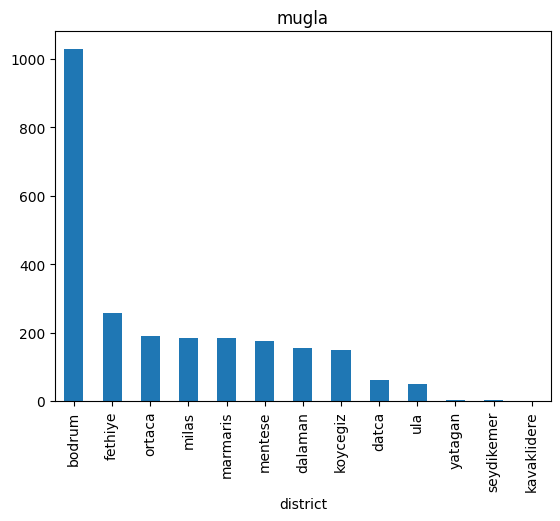

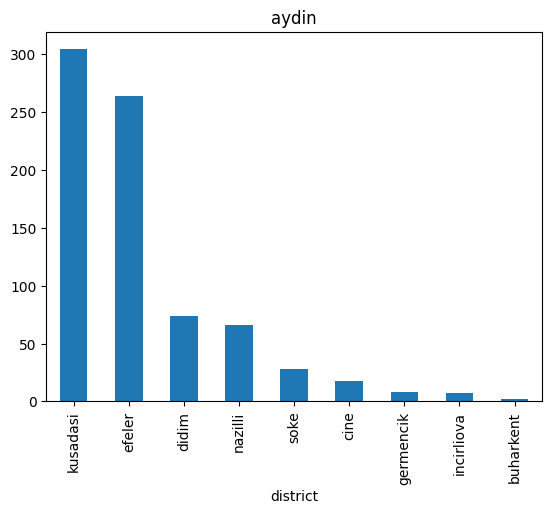

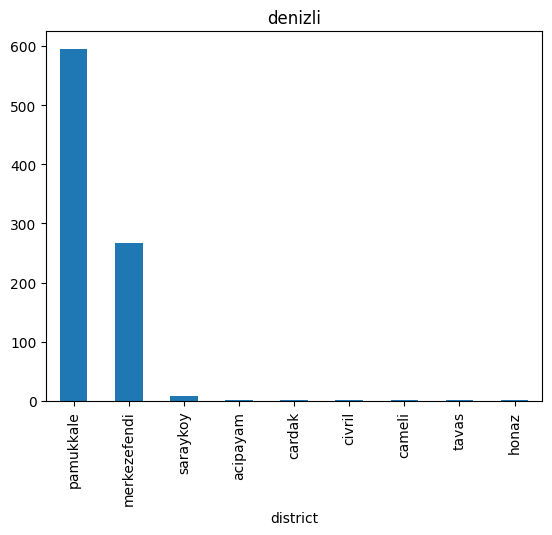

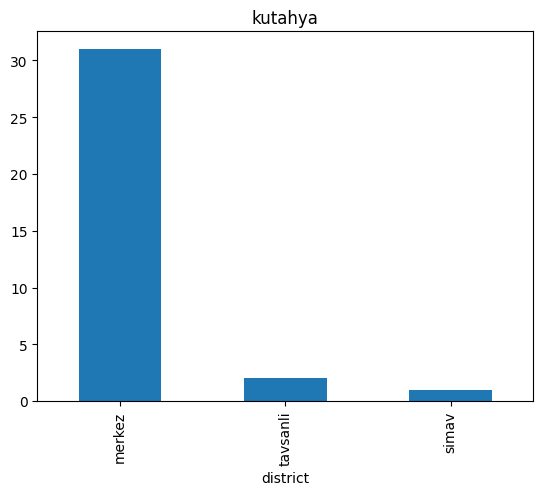

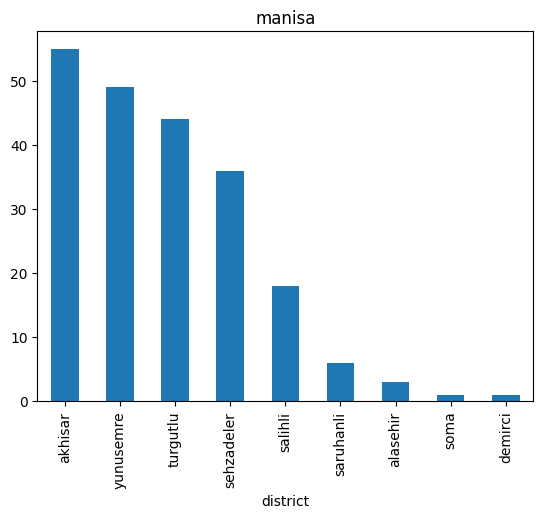

In [7]:
for city in df['city'].unique():
    df[df['city'] == city]['district'].value_counts().plot(kind='bar', title=city)
    plt.show()

Geriye kalan sütunların görüntülenmesi

In [8]:
print(df.columns)

Index(['list-view-price', 'celly', 'celly 2', 'celly 3', 'celly 4',
       'list-view-header', 'list-view-location', 'city', 'district',
       'neighborhood'],
      dtype='object')


Oda ve salon sayılarının `celly` sütunundan ayrıştırılması

In [9]:
print(df['celly'].unique())

['3 +\n                        1' '2 +\n                        1'
 '1 +\n                        1' '4 +\n                        1'
 '2 +\n                        0' 'Stüdyo'
 '3 +\n                        0' '1 +\n                        15'
 '2 +\n                        2' '6 +\n                        2'
 '4 +\n                        2' '3 +\n                        2'
 '9 +\n                        1' '6 +\n                        1'
 '8 +\n                        1' '5 +\n                        1'
 '41 +\n                        4' '4 +\n                        0'
 '5 +\n                        2' '1 +\n                        25'
 '7 +\n                        1' '21 +\n                        1'
 '7 +\n                        2' '6 +\n                        0'
 '9 +\n                        4' '4 +\n                        4'
 '3 +\n                        3' '31 +\n                        1'
 '9 +\n                        3' '25 +\n                        5'
 '8 +\n      

In [10]:
df["celly"] = df["celly"].apply(lambda x: x.replace('Stüdyo', '1 + 0'))
df["celly"] = df["celly"].apply(lambda x: x.replace('\n', ''))
df["room"] = df["celly"].apply(lambda x: x.split('+')[0]).astype(int)
df["living_room"] = df["celly"].apply(lambda x: x.split('+')[1]).astype(int)

print(df["room"].unique())
print(df["living_room"].unique())

print(df["room"].value_counts())
print(df["living_room"].value_counts())

[ 3  2  1  4  6  9  8  5 41  7 21 31 25 14 10]
[ 1  0 15  2  4 25  3  5  9  6]
room
3     2825
2     2821
1     1680
4      582
5      154
6       41
7       12
9        9
8        3
21       3
31       2
41       1
25       1
14       1
10       1
Name: count, dtype: int64
living_room
1     7815
2      155
0      148
4        7
3        4
5        3
15       1
25       1
9        1
6        1
Name: count, dtype: int64


`celly` sütunun çıkarılması ve ayrıştırılan oda ve salon sayılarındaki çok uç değerlerin temizlenmesi

In [11]:
df.drop(['celly'], axis=1, inplace=True)

df = df[(df['room'] <= 7) & (df['living_room'] <= 2)]

print(df['room'].unique())
print(df['living_room'].unique())

[3 2 1 4 6 5 7]
[1 0 2]


Metrekare değerlerinin `celly 2` sütunundan ayrıştırılması

In [12]:
print(df['celly 2'].unique())

['150 m²' '110 m²' '60 m²' '50 m²' '300 m²' '117 m²' '70 m²' '140 m²'
 '130 m²' '75 m²' '160 m²' '165 m²' '135 m²' '85 m²' '120 m²' '48 m²'
 '125 m²' '80 m²' '95 m²' '100 m²' '105 m²' '180 m²' '3.200 m²' '90 m²'
 '76 m²' '55 m²' '65 m²' '145 m²' '45 m²' '115 m²' '35 m²' '53 m²'
 '155 m²' '148 m²' '78 m²' '151 m²' '270 m²' '440 m²' '132 m²' '121 m²'
 '141 m²' '170 m²' '122 m²' '200 m²' '87 m²' '146 m²' '220 m²' '108 m²'
 '370 m²' '86 m²' '380 m²' '47 m²' '43 m²' '63 m²' '245 m²' '204 m²'
 '183 m²' '190 m²' '600 m²' '119 m²' '72 m²' '350 m²' '142 m²' '166 m²'
 '870 m²' '330 m²' '96 m²' '41 m²' '143 m²' '280 m²' '64 m²' '57 m²'
 '286 m²' '340 m²' '81 m²' '185 m²' '40 m²' '168 m²' '116 m²' '93 m²'
 '209 m²' '59 m²' '77 m²' '400 m²' '98 m²' '106 m²' '174 m²' '205 m²'
 '74 m²' '500 m²' '68 m²' '275 m²' '52 m²' '137 m²' '167 m²' '217 m²'
 '25 m²' '250 m²' '290 m²' '112 m²' '196 m²' '184 m²' '450 m²' '159 m²'
 '195 m²' '640 m²' '230 m²' '260 m²' '285 m²' '235 m²' '337 m²' '211 m²'
 '240 m²' '1

[ 150  110   60   50  300  117   70  140  130   75  160  165  135   85
  120   48  125   80   95  100  105  180 3200   90   76   55   65  145
   45  115   35   53  155  148   78  151  270  440  132  121  141  170
  122  200   87  146  220  108  370   86  380   47   43   63  245  204
  183  190  600  119   72  350  142  166  870  330   96   41  143  280
   64   57  286  340   81  185   40  168  116   93  209   59   77  400
   98  106  174  205   74  500   68  275   52  137  167  217   25  250
  290  112  196  184  450  159  195  640  230  260  285  235  337  211
  240  134  832 1000   38  147  152   88  213  126  255  199  127   11
  154   22   66  399  187   67  210   89  355   97   84   42   51   73
  325   71 3000  175  320  156  162   18   56  136  131  580  375  161
  163  149  206  138  475  359  124   91  194 4500   20  103   58  302
  505  800  368  178  750   92  181   30  460  390  360  550 4000  295
  128  341  745  118  144   15   82   49  176  182  981  256   62   32
 3510 

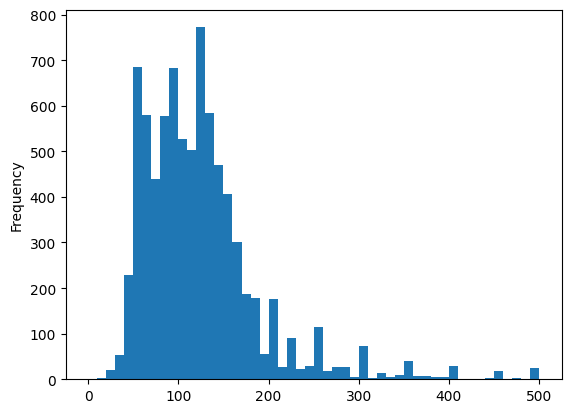

In [13]:
df['celly 2'] = df['celly 2'].apply(lambda x: x.replace('.', ''))
df['area'] = df['celly 2'].apply(lambda x: x.split(' ')[0]).astype(int)

print(df['area'].unique())
df['area'].plot(kind='hist', bins=50, range=(0, 500))

df.drop(['celly 2'], axis=1, inplace=True)

Bina yaşlarının `celly 3` sütunundan ayrıştırılması

In [14]:
print(df['celly 3'].unique())

['20\n                      Yaşında' '8\n                      Yaşında'
 'Sıfır Bina' '10\n                      Yaşında'
 '11\n                      Yaşında' '5\n                      Yaşında'
 '4\n                      Yaşında' '3\n                      Yaşında'
 '15\n                      Yaşında' '1\n                      Yaşında'
 '24\n                      Yaşında' '2\n                      Yaşında'
 '17\n                      Yaşında' '30\n                      Yaşında'
 '28\n                      Yaşında' '25\n                      Yaşında'
 '16\n                      Yaşında' '21\n                      Yaşında'
 '18\n                      Yaşında' '31\n                      Yaşında'
 '22\n                      Yaşında' '7\n                      Yaşında'
 '13\n                      Yaşında' '9\n                      Yaşında'
 '6\n                      Yaşında' '35\n                      Yaşında'
 '39\n                      Yaşında' '14\n                      Yaşında'
 '19\n    

In [15]:
df['celly 3'] = df['celly 3'].apply(lambda x: x.replace('Sıfır Bina', '0'))
df['celly 3'] = df['celly 3'].apply(lambda x: x.replace('\n', ' '))
df['age'] = df['celly 3'].apply(lambda x: x.split(' ')[0]).astype(int)

print(df['age'].unique())
print(df['age'].value_counts())

df.drop("celly 3", axis=1, inplace=True)

[ 20   8   0  10  11   5   4   3  15   1  24   2  17  30  28  25  16  21
  18  31  22   7  13   9   6  35  39  14  19  33  26  12  29  49  27  32
  52  40  38  44  34  23  45  50  42  55  36  43  37  47 300  48 199 100
  60  61 600]
age
5      910
0      843
15     567
10     543
25     464
20     442
4      412
30     372
1      336
11     331
3      303
2      298
16     245
8      210
7      208
21     184
6      176
26     156
12     150
35     139
31     126
18      76
9       72
40      72
13      65
28      62
17      60
14      40
22      33
23      28
27      25
29      21
24      18
19      17
45      15
32      15
50      11
38      10
33       9
37       6
34       6
36       5
55       3
44       3
39       3
42       3
49       2
43       1
52       1
47       1
300      1
48       1
199      1
100      1
60       1
61       1
600      1
Name: count, dtype: int64


Kat sayılarının `celly 4` sütunundan ayrıştırılması

In [16]:
print(df['celly 4'].unique())

['Kot 2' '1. Kat' '4. Kat' '5. Kat' '7. Kat' '3. Kat' '2. Kat' 'Kot 1'
 'Yüksek Giriş' '9. Kat' 'Ara Kat' 'En Üst Kat' 'Bahçe Katı' 'Yarı Bodrum'
 nan 'Bodrum' 'Kot 3' 'Çatı Katı' 'Zemin' '8. Kat' 'Giriş Katı' '6. Kat'
 '16. Kat' '17. Kat' 'Villa Katı' '10. Kat' '13. Kat' '12. Kat' '11. Kat'
 '14. Kat' '21 ve üzeri' 'Bodrum ve Zemin' 'Asma Kat' '18. Kat' 'Tripleks'
 'Teras Katı' '15. Kat' '20. Kat' '19. Kat']


In [18]:
replace_dict = {
    'Kot 3': '-3. Kat',
    'Kot 2': '-2. Kat',
    'Ara Kat': '2. Kat'
}

def replace_func(df, col, replace_dict_):
    df[col] = df[col].replace(replace_dict_.keys(), replace_dict_.values())


search_for = ['nan', 'Kot 3', 'Kot 2', 'Kot 1', 'Yüksek Giriş', 'Ara Kat', 'En Üst Kat', 'Bahçe Katı', 'Yarı Bodrum', 'Bodrum', 'Çatı Katı', 'Zemin', 'Giriş Katı', 'Villa Katı', '21 ve üzeri', 'Bodrum ve Zemin', 'Asma Kat', 'Tripleks', 'Teras Katı']
replace_with = ['2. Kat', '-3. Kat', '-2. Kat', '-1. Kat', '1. Kat', '3. Kat', '5. Kat', '0. Kat', '0. Kat', '0. Kat', '5. Kat', '5. Kat', '1. Kat', '1. Kat', '21. Kat', '0. Kat', '1. Kat', '3. Kat', '5. Kat']
df['celly 4'] = df['celly 4'].replace(search_for, replace_with).astype(str)
df['celly 4'].dropna(inplace=True)

print(df['celly 4'].unique())
df['floor'] = df['celly 4'].apply(lambda x: x.split('.')[0]).astype(int)

print(df['floor'].unique())
print(df['floor'].value_counts())

['-2. Kat' '1. Kat' '4. Kat' '5. Kat' '7. Kat' '3. Kat' '2. Kat' '-1. Kat'
 '9. Kat' '0. Kat' '-3. Kat' '8. Kat' '6. Kat' '16. Kat' '17. Kat'
 '10. Kat' '13. Kat' '12. Kat' '11. Kat' '14. Kat' '21. Kat' '18. Kat'
 '15. Kat' '20. Kat' '19. Kat']
[-2  1  4  5  7  3  2 -1  9  0 -3  8  6 16 17 10 13 12 11 14 21 18 15 20
 19]
floor
 2     2569
 1     1568
 3     1453
 5      888
 0      795
 4      418
 6      102
 7       80
 8       43
-2       39
-1       39
 11      18
-3       16
 9       14
 10      12
 13      11
 21       9
 12       8
 14       8
 18       4
 16       3
 15       3
 17       2
 20       2
 19       1
Name: count, dtype: int64


In [19]:
df.drop('celly 4', axis=1, inplace=True)

Fiyat değerlerinin `list-view-price` sütunundan ayrıştırılması

In [20]:
print(df['list-view-price'].unique())

[7.0 8.5 16.5 20.0 22.0 7.25 15.0 10.0 7.5 6.75 21.0 14.0 8.0 '7.500'
 '8.500' '15.000' '5.000' '7.000' '8.000' '11.000' '9.000' '3.000'
 '10.000' '6.500' '2.500' '6.000' '5.500' '8.750' '4.250' '4.500' '12.500'
 '5.250' '12.000' '7.250' '6.750' '7.750' '3.500' '6.600' '5.100' '13.000'
 '5.600' '1.100.000' '9.500' '4.000' '13.250' '19.000' '29.000' '30.000'
 '25.000' '18.500' '83.000' '14.000' '380.000' '20.000' '210.000'
 '280.000' '325.000' '16.000' '9.250' '37.500' '600.000' '350' '15.500'
 '500.000' '200.000' '20.500' '13.500' '11.500' '17.000' '800.000'
 '10.500' '22.000' '18.000' '50.000' '65.000' '550.000' '45.000' '33.000'
 '100.000' '21.500' '28.500' '26.000' '22.500' '220.000' '400.000'
 '39.000' '27.500' '16.500' '29.500' '15.750' '40.000' '21.750' '35.000'
 '25.500' '21.000' '235.000' '34.000' '96.000' '55.000' '425.000' '24.000'
 '23.000' '19.750' '70.000' '52.500' '32.000' '450.000' '275.000' '19.360'
 '17.500' '19.500' '370.000' '350.000' '9.800' '680.000' '15.590.000'
 

In [21]:
df['list-view-price'] = df['list-view-price'].astype(str).apply(lambda x: x.replace('.', ''))
df['price'] = df['list-view-price'].astype(int)

print(df['price'].unique())

[       70        85       165       200       220       725       150
       100        75       675       210       140        80      7500
      8500     15000      5000      7000      8000     11000      9000
      3000     10000      6500      2500      6000      5500      8750
      4250      4500     12500      5250     12000      7250      6750
      7750      3500      6600      5100     13000      5600   1100000
      9500      4000     13250     19000     29000     30000     25000
     18500     83000     14000    380000     20000    210000    280000
    325000     16000      9250     37500    600000       350     15500
    500000    200000     20500     13500     11500     17000    800000
     10500     22000     18000     50000     65000    550000     45000
     33000    100000     21500     28500     26000     22500    220000
    400000     39000     27500     16500     29500     15750     40000
     21750     35000     25500     21000    235000     34000     96000
     5

In [22]:
df.drop('list-view-price', axis=1, inplace=True)

Kalan sütunların görüntülenmesi

In [23]:
print(df.columns)

Index(['list-view-header', 'list-view-location', 'city', 'district',
       'neighborhood', 'room', 'living_room', 'area', 'age', 'floor', 'price'],
      dtype='object')


In [24]:
df.drop(['list-view-header', 'list-view-location'], axis=1, inplace=True)

In [25]:
print(df.columns)

Index(['city', 'district', 'neighborhood', 'room', 'living_room', 'area',
       'age', 'floor', 'price'],
      dtype='object')


Düzenlenen verilerin tek bir .csv dosyasına kaydedilmesi

In [26]:
df.to_csv('hepsiemlak.csv', index=False)